<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Machine_Learning/Tree_based/03-01-03-01-tree-based-models-gradient-boosted-gbm-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 3.1 Gradient Boosting Machine (GBM)


Generalized Boosted  Models, often referred to as Gradient Boosting Machines (GBM), is a powerful ensemble learning technique that builds models in a sequential manner, where each new model attempts to correct the errors made by the previous ones. This notebook provides an overview of GBM, its mathematical formulation, and practical implementation in R using the {gbm} package for both regression and classification tasks.


## Overview

A Gradient Boosting Machine (GBM) is a powerful machine learning algorithm used primarily for regression and classification tasks. It builds an ensemble of weak learners, typically decision trees, in a sequential manner to minimize a loss function. Each tree corrects the errors of the previous ones by fitting to the negative gradient of the loss function, effectively improving the model's predictions iteratively.

GBM is widely used due to its flexibility, ability to handle various types of data, and high predictive accuracy. Popular implementations include XGBoost, LightGBM, and CatBoost.


### Key Features of GBM

Gradient Boosting Machine (GBM) key features:

1. `Ensemble Learning`: Combines weak learners (decision trees) sequentially.
2. `Gradient Descent`: Minimizes loss function iteratively.
3. `Sequential Correction`: Each tree corrects prior errors.
4. `Flexible Loss Functions`: Supports various loss types.
5. `Regularization`: Uses shrinkage and subsampling to prevent overfitting.
6. `Feature Importance`: Identifies key predictors.
7. `Non-linear Relationships`: Captures complex patterns.
8. `Robustness`: Handles outliers with robust loss functions.
9. `Scalability`: Optimized in tools like XGBoost, LightGBM.
10. `Missing Data`: Natively handles missing values.
11. `Categorical Features`: Efficiently processes categorical data.
12. `Tunable Hyperparameters`: Allows performance optimization.


### How Gradient Boosting Works

Gradient Boosting constructs a model by combining multiple weak learners (usually shallow decision trees) in an additive fashion. It optimizes a specified loss function by iteratively adding trees that reduce the loss. Below is a step-by-step explanation, including the mathematical formulation:

1.  Initialize the Model

The process starts with an initial prediction, often a constant value that minimizes the loss function. For regression, this is typically the mean of the target variable.

$$ F_0(x) = \arg\min_{\gamma} \sum_{i=1}^n L(y_i, \gamma) $$

where:

-   $F_0(x)$: Initial model prediction (e.g., mean for regression).

-   $L(y_i, \gamma)$: Loss function (e.g., mean squared error for regression: $L(y_i, \gamma) = \frac{1}{2}(y_i - \gamma)^2$).

-   $y_i$: True target value for the $i$-th observation.

-   $n$: Number of observations.

For regression with mean squared error, the initial prediction is:

$$ F_0(x) = \frac{1}{n} \sum L_{i=1}^n y_i $$

2.  Compute Residuals (Negative Gradients)

For each iteration $m = 1, 2, ..., M$, compute the residuals, which are the negative gradients of the loss function with respect to the current model's predictions.

$$ r_{im} = -\left[ \frac{\partial L(y_i, F(x_i))}{\partial F(x_i)} \right]_{F(x) = F_{m-1}(x)} $$

where:

-   $r_{im}$: Residual for the $i$-th observation at iteration $m$.

-   $F_{m-1}(x)$: Model prediction from the previous iteration.

-   For mean squared error: $L(y_i, F(x_i)) = \frac{1}{2}(y_i - F(x_i))^2$, the residual is:

$$ r_{im} = y_i - F_{m-1}(x_i) $$

3.  Fit a Weak Learner to Residuals

Train a weak learner (e.g., a decision tree) to predict the residuals $r_{im}$. The tree is fitted to minimize the loss when predicting the residuals.

$$ h_m(x) = \arg\min_{h} \sum_{i=1}^n (r_{im} - h(x_i))^2 $$

where:

-   $h_m(x)$: Weak learner (e.g., decision tree) at iteration $m$.

4.  Compute the Optimal Step Size (Learning Rate)

Determine the step size (or learning rate) $\gamma_m$ to scale the contribution of the new tree. This is done by minimizing the loss function along the direction of the new tree.

$$ \gamma_m = \arg\min_{\gamma} \sum_{i=1}^n L(y_i, F_{m-1}(x_i) + \gamma h_m(x_i)) $$

For mean squared error, this can be solved analytically or via line search.

5.  Update the Model

Update the model by adding the scaled predictions of the new tree to the previous model.

$$ F_m(x) = F_{m-1}(x) + \gamma_m h_m(x) $$

where:

-   $F_m(x)$: Updated model after iteration $m$.

-   $\gamma_m$: Learning rate or step size (typically a small value, e.g., 0.1, to prevent overfitting).

6.  Repeat Steps 2–5

Repeat steps 2–5 for $M$ iterations or until a stopping criterion (e.g., minimal improvement in loss) is met.

7.  Final Prediction

The final model is the sum of the initial prediction and all subsequent trees' contributions:

$$ F_M(x) = F_0(x) + \sum_{m=1}^M \gamma_m h_m(x) $$

Here below is a flowchart illustrating the Random Forest workflow:


![alt text](http://drive.google.com/uc?export=view&id=1wO9IGbhk_Sm5VMp6TjqpHX44eS6Ax0Eg)








### Advantages of Gradient Boosting Machine (GBM)

1. `High Accuracy`: Often outperforms other algorithms by effectively modeling complex, non-linear relationships.
2. `Flexibility`: Supports various loss functions and works for both regression and classification tasks.
3. `Feature Importance`: Provides insights into which features drive predictions.
4. `Handles Mixed Data`: Effectively processes numerical and categorical features (especially in implementations like CatBoost).
5. `Robustness`: Can handle outliers and missing data with appropriate configurations.

### Limitations of GBM

1. `Computationally Intensive`: Training can be slow, especially with large datasets or many trees.
2. `Overfitting Risk`: Requires careful tuning to avoid overfitting, particularly with noisy data.
3. `Hyperparameter Sensitivity`: Performance depends heavily on proper tuning, which can be time-consuming.
4. `Less Interpretable`: Compared to simpler models like linear regression, the ensemble is harder to interpret.
5. `Scalability Issues`: Less efficient on extremely large datasets compared to simpler models unless optimized (e.g., LightGBM).

### Key Hyperparameters of GBM

1. `n.trees`: Number of trees (100–10,000). Tune with CV (e.g., 500, 1000, 2000).
2. `shrinkage`: Learning rate (0.001–0.3). Try 0.01, 0.05, 0.1 for balance.
3. `interaction.depth`: Tree depth (1–10). Use 1–5 for weak learners.
4. `n.minobsinnode`: Min observations per node (5–20). Try 5–10 for small datasets.
5. `bag.fraction*` Subsampling fraction (0.5–1.0). Default 0.5 reduces overfitting.
6. `distribution`: Loss function (e.g., `gaussian` for regression, `bernoulli` for classification).

Proper tuning of these hyperparameters is critical for balancing performance and generalization in GBM.

### How GBM Differs from XGBoost and LightGBM

Gradient Boosting Machine (GBM) is a general framework for building ensemble models by sequentially adding weak learners (typically decision trees) to minimize a loss function. XGBoost and LightGBM are optimized implementations of the GBM framework, each introducing specific enhancements to improve performance, scalability, and efficiency. Below is a detailed comparison of how GBM differs from XGBoost and LightGBM, focusing on key aspects such as algorithmic improvements, optimization techniques, and practical considerations.

  | **Aspect** | **Standard GBM** | **XGBoost** | **LightGBM** |
    |-----------------|-------------------|-------------------|------------------|
    | **Algorithm** | Basic gradient boosting | Enhanced gradient boosting with regularization | Optimized gradient boosting with GOSS, EFB |
    | **Tree Growth** | Level-wise | Level-wise | Leaf-wise |
    | **Regularization** | Basic (learning rate) | L1 and L2 regularization | L1 and L2 regularization |
    | **Gradient Usage** | First-order gradients | First- and second-order gradients | First-order with GOSS sampling |
    | **Feature Handling** | Requires preprocessing (e.g., imputation) | Handles missing values natively | Handles missing values and categorical features natively |
    | **Split Finding** | Exact split finding | Approximate (quantile sketching) | Histogram-based |
    | **Parallelization** | Sequential | Feature-level parallelization | Data- and feature-level parallelization |
    | **Memory Efficiency** | High memory usage | Moderate memory usage | Low memory usage (histogram, EFB) |
    | **Speed** | Slowest | Faster than GBM | Fastest, especially for large datasets |
    | **Overfitting Risk** | Moderate | Low (due to regularization) | Higher with leaf-wise growth (needs tuning) |
    | **Implementation** | Scikit-learn, others | XGBoost library | LightGBM library |


### Practical Considerations

-   **Standard GBM**:

    -   Best for small datasets or when simplicity is preferred.
    -   Suitable for educational purposes or when using scikit-learn’s ecosystem.
    -   Limited scalability for large datasets due to lack of optimizations.

-   **XGBoost**:
    -   Ideal for medium to large datasets where accuracy is critical.
    -   Preferred when robust regularization and handling of missing data are needed.
    -   Widely used in competitions (e.g., Kaggle) due to its balance of speed and accuracy.

-   **LightGBM**:
    -   Best for very large datasets or high-dimensional data (e.g., millions of rows, thousands of features).
    -   Preferred for applications requiring fast training and low memory usage.
    -   Requires careful tuning to avoid overfitting due to leaf-wise growth.

## Setup R in Python Runtype

### Install {rpy2}

{rpy2} is a Python package that provides an interface to the R programming language, allowing Python users to run R code, call R functions, and manipulate R objects directly from Python. It enables seamless integration between Python and R, leveraging R's statistical and graphical capabilities while using Python's flexibility. The package supports passing data between the two languages and is widely used for statistical analysis, data visualization, and machine learning tasks that benefit from R's specialized libraries.

In [1]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.17
Uninstalling rpy2-3.5.17:
  Successfully uninstalled rpy2-3.5.17
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp311-cp311-linux_x86_64.whl size=314973 sha256=f4cdda2ce9c384ae2501ae5c1b2351b332e6f10d564a1b3899f67f01a6e910d4
  Stored in directory: /root/.cache/pip/wheels/e9/55/d1/47be85a5f3f1e1f4d1e91cb5e3a4dcb40dd72147f184c5a5ef
Successfully built rpy2


### Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Gradient Boosting Machine (GBM) in R from scratch

We’ll implement a basic GBM algorithm from scratch. This will involve manually coding the gradient boosting steps (initialization, residual computation, fitting weak learners, and updating predictions) using only base R.

### Function to Fit a Decision Stump

`fit_stump` finds the best feature and threshold to split the data, minimizing MSE. It evaluates each feature’s unique values as thresholds and computes the mean of the target variable (SOC) for the left and right splits. The split with the lowest MSE is chosen as the best stump.


A `decision stump`is a simple machine learning model consisting of a single-level decision tree with only one split (or decision node) based on a single feature. It is considered a weak learner because it makes predictions using a single threshold or condition, resulting in limited predictive power on its own. Decision stumps are commonly used as base learners in ensemble methods like boosting (e.g., AdaBoost, Gradient Boosting) to iteratively combine multiple weak models into a strong predictive model.






In [ ]:
%%R
# Helper function: Simple decision stump (single split tree)
decision_stump <- function(X, y, weights, is_regression) {
  n <- length(y)
  best_feature <- 0
  best_threshold <- 0
  best_error <- Inf

  # Try each feature and possible split points
  for (feature in 1:ncol(X)) {
    values <- sort(unique(X[, feature]))
    thresholds <- (values[-length(values)] + values[-1]) / 2

    for (threshold in thresholds) {
      left_idx <- X[, feature] <= threshold
      right_idx <- !left_idx

      if (sum(left_idx) == 0 || sum(right_idx) == 0) next

      if (is_regression) {
        # Regression: predict mean for each region
        left_pred <- mean(y[left_idx])
        right_pred <- mean(y[right_idx])
        error <- sum(weights[left_idx] * (y[left_idx] - left_pred)^2) +
                 sum(weights[right_idx] * (y[right_idx] - right_pred)^2)
      } else {
        # Classification: predict log-odds for each region
        left_prob <- mean(y[left_idx])
        right_prob <- mean(y[right_idx])
        left_prob <- max(min(left_prob, 0.999), 0.001) # Avoid log(0)
        right_prob <- max(min(right_prob, 0.999), 0.001)
        error <- -sum(weights[left_idx] * (y[left_idx] * log(left_prob) +
                                          (1 - y[left_idx]) * log(1 - left_prob))) -
                 sum(weights[right_idx] * (y[right_idx] * log(right_prob) +
                                          (1 - y[right_idx]) * log(1 - right_prob)))
      }

      if (error < best_error) {
        best_error <- error
        best_feature <- feature
        best_threshold <- threshold
        best_left_pred <- if (is_regression) left_pred else log(left_prob / (1 - left_prob))
        best_right_pred <- if (is_regression) right_pred else log(right_prob / (1 - right_prob))
      }
    }
  }

  return(list(feature = best_feature, threshold = best_threshold,
              left_pred = best_left_pred, right_pred = best_right_pred))
}

### Function to Predict with a Decision Stump

`predict_stump`: Predicts based on the stump’s feature, threshold, and leaf values.


In [ ]:
%%R
# Predict function for a single decision stump
predict_stump <- function(stump, X) {
  preds <- rep(stump$right_pred, nrow(X))
  left_idx <- X[, stump$feature] <= stump$threshold
  preds[left_idx] <- stump$left_pred
  return(preds)
}

### GBM for Regression and Classification

In [ ]:
%%R
# GBM for Regression
gbm_regression <- function(X, y, n_trees = 50, learning_rate = 0.1, max_depth = 1) {
  n <- length(y)
  # Initialize predictions with mean
  f <- rep(mean(y), n)
  trees <- list()

  for (m in 1:n_trees) {
    # Compute residuals (negative gradient of squared loss)
    residuals <- y - f
    weights <- rep(1/n, n) # Uniform weights for regression

    # Fit a decision stump to residuals
    tree <- decision_stump(X, residuals, weights, TRUE)

    # Update predictions
    f <- f + learning_rate * predict_stump(tree, X)
    trees[[m]] <- tree
  }

  return(list(trees = trees, learning_rate = learning_rate, init_pred = mean(y)))
}


# GBM for Classification (binary)
gbm_classification <- function(X, y, n_trees = 50, learning_rate = 0.1, max_depth = 1) {
  n <- length(y)
  # Initialize with log-odds
  p <- mean(y)
  p <- max(min(p, 0.999), 0.001) # Avoid log(0)
  f <- rep(log(p / (1 - p)), n)
  trees <- list()

  for (m in 1:n_trees) {
    # Compute probabilities
    p <- 1 / (1 + exp(-f))
    # Compute residuals (negative gradient of log-loss)
    residuals <- y - p
    weights <- p * (1 - p) # Weights based on variance of logistic

    # Fit a decision stump to residuals
    tree <- decision_stump(X, residuals, weights, FALSE)

    # Update predictions
    f <- f + learning_rate * predict_stump(tree, X)
    trees[[m]] <- tree
  }

  return(list(trees = trees, learning_rate = learning_rate, init_pred = log(p / (1 - p))))
}

## Predict Functions



In [ ]:
%%R
# Predict function for GBM regression
predict_gbm_regression <- function(model, X) {
  preds <- rep(model$init_pred, nrow(X))
  for (tree in model$trees) {
    preds <- preds + model$learning_rate * predict_stump(tree, X)
  }
  return(preds)
}

# Predict function for GBM classification
predict_gbm_classification <- function(model, X) {
  f <- rep(model$init_pred, nrow(X))
  for (tree in model$trees) {
    f <- f + model$learning_rate * predict_stump(tree, X)
  }
  # Return probabilities
  return(1 / (1 + exp(-f)))
}

### Example Usage - Regression

In [ ]:
%%R
# Example usage
set.seed(123)# Example usage
# Generate synthetic data for regression
n <- 100
X <- matrix(runif(n * 2, 0, 10), ncol = 2)
y_reg <- 2 * X[, 1] + 3 * X[, 2] + rnorm(n, 0, 1)

# Train and predict regression
model_reg <- gbm_regression(X, y_reg, n_trees = 50, learning_rate = 0.1)
preds_reg <- predict_gbm_regression(model_reg, X)
# Print mean squared error for regression
cat("Regression MSE:", mean((y_reg - preds_reg)^2), "\n")

Regression MSE: 5.25712 


### Example Usage: Classification

In [ ]:
%%R
# Generate synthetic data for classification
y_class <- as.numeric(X[, 1] + X[, 2] > 10)
y_class <- y_class + rnorm(n, 0, 0.1) > 0 # Add noise
y_class <- as.numeric(y_class > 0.5)

# Train and predict classification
model_class <- gbm_classification(X, y_class, n_trees = 50, learning_rate = 0.1)
preds_class <- predict_gbm_classification(model_class, X)

# Print classification accuracy
cat("Classification Accuracy:", mean((preds_class > 0.5) == y_class), "\n")

Classification Accuracy: 0.27 


## Gradient Boosting Machine (GBM) in R

In this section, we will use the {gbm} package to perform regression and classification tasks. We will load the dataset, preprocess it, and then fit a GBM model for both regression and classification. The dataset will be split into training and testing sets, and we will evaluate the model's performance using RMSE for regression and accuracy for classification.

The {gbm} package in R is a popular library for implementing Gradient Boosting Machines, specifically designed for regression, classification, and ranking tasks. It provides an efficient and flexible framework for gradient boosting, building on the foundational algorithm described by Friedman (2001).

Key Functions:

-   `gbm()`: Main function to fit a gradient boosting model.

-   `predict.gbm()`: Makes predictions on new data.

-   `gbm.perf()` : Evaluates model performance and optimal number of trees using out-of-bag or cross-validation estimates.

-   `relative.influence()`: Computes variable importance.

In [ ]:
%%R
remotes::install_github("gbm-developers/gbm", lib='drive/My Drive/R/')

── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpWBBV5N/remotes42772860cc3b/gbm-developers-gbm-59cc7a9/DESCRIPTION’ ... OK
* preparing ‘gbm’:
* checking DESCRIPTION meta-information ... OK
* cleaning src
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘gbm_2.2.2.tar.gz’



### Check and Install Required R Packages

Following R packages are required to run this notebook. If any of these packages are not installed, you can install them using the code below:

In [11]:
%%R
packages <- c('tidyverse',
              'plyr',
              'gbm',
              'MASS',
              'Metrics',
              'fastDummies',
              'ggpmisc',
              'Metrics'

         )

#### Install Missing Packages

In [ ]:
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

# Ensure gbm is installed in the specified library path
if (!requireNamespace("gbm", quietly = TRUE, lib.loc = 'drive/My Drive/R/')) {
  install.packages("gbm", lib = 'drive/My Drive/R/')
}



#### Verify Installation

In [12]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:
  tidyverse        plyr         gbm        MASS     Metrics fastDummies 
       TRUE        TRUE        TRUE        TRUE        TRUE        TRUE 
    ggpmisc     Metrics 
       TRUE        TRUE 


#### Load R Packages

In [7]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))

#### Check Loaded Packages

In [13]:
%%R
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])# Check loaded packageswer)

Successfully loaded packages:
 [1] "package:MASS"        "package:ggpmisc"     "package:ggpp"       
 [4] "package:fastDummies" "package:Metrics"     "package:gbm"        
 [7] "package:plyr"        "package:lubridate"   "package:forcats"    
[10] "package:stringr"     "package:dplyr"       "package:purrr"      
[13] "package:readr"       "package:tidyr"       "package:tibble"     
[16] "package:ggplot2"     "package:tidyverse"   "package:tools"      
[19] "package:stats"       "package:graphics"    "package:grDevices"  
[22] "package:utils"       "package:datasets"    "package:methods"    
[25] "package:base"       


### Regression with GBM

In this section, we will use the {gbm} package to perform regression tasks. We will load the dataset, preprocess it, and then fit a GBM model for regression. The dataset will be split into training and testing sets, and we will evaluate the model's performance using Mean Squared Error (MSE) and Root Mean Squared Error (RMSE).

#### Data and Data Preparation



In [8]:
%%R
data("Boston", library = `MASS`)
# Create a data frame with selected variables
df <- Boston %>%
  dplyr::select(medv, crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, black, lstat)

# Convert chas to factor (categorical variable)
df$chas <- as.factor(df$chas)
# Convert rad and tax to numeric (in case they are integers or factors)
df$rad <- as.numeric(df$rad)
df$tax <- as.numeric(df$tax)

# Verify data types
str(df)

# Split data into training (70%) and test (30%) sets, stratified by chas
seeds <- 11076
tr_prop <- 0.70
set.seed(seeds)

# Stratified sampling for training data
train <- ddply(df, .(chas),
               function(., seed) { set.seed(seed); .[sample(1:nrow(.), trunc(nrow(.) * tr_prop)), ] },
               seed = seeds)
test <- ddply(df, .(chas),
              function(., seed) { set.seed(seed); .[-sample(1:nrow(.), trunc(nrow(.) * tr_prop)), ] },
              seed = seeds)

# Scale the numeric features (exclude medv and chas)
numeric_cols <- c("crim", "zn", "indus", "nox", "rm", "age", "dis", "rad", "tax", "ptratio", "black", "lstat")
train[numeric_cols] <- scale(train[numeric_cols])
test[numeric_cols] <- scale(test[numeric_cols])

'data.frame':	506 obs. of  14 variables:
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : num  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...


#### Fit a GBM Regression Model

`gbm()` function is used to fit the GBM model. The `formula` argument specifies the response variable (SOC) and the predictor variables The `distribution` argument is set to "gaussian" for regression tasks. Other parameters such as `n.trees`, `shrinkage`, `interaction.depth`, and `n.minobsinnode` are set to control the model complexity and training process.


In [16]:
%%R
# Fit a GBM
set.seed(123)
.libPaths('drive/My Drive/R/') # Set the library path
initial_model <- gbm(
  formula = medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + black + lstat,
  data = train,
  distribution = "gaussian",  # For regression
  n.trees = 100,
  shrinkage = 0.1,
  interaction.depth = 3,
  n.minobsinnode = 10
)
initial_model

gbm(formula = medv ~ crim + zn + indus + chas + nox + rm + age + 
    dis + rad + tax + ptratio + black + lstat, distribution = "gaussian", 
    data = train, n.trees = 100, interaction.depth = 3, n.minobsinnode = 10, 
    shrinkage = 0.1)
A gradient boosted model with gaussian loss function.
100 iterations were performed.
There were 13 predictors of which 12 had non-zero influence.


#### GBM Performance Evaluation

`gbm.perf()`estimates the optimal number of boosting iterations for a gbm object and optionally plots various performance measures. The `method` argument is set to "OOB" to omputes the out-of-bag estimate. The number of trees (`n.trees`) is determined based on the minimum cross-validated error.

[1] 35
attr(,"smoother")
Call:
loess(formula = object$oobag.improve ~ x, enp.target = min(max(4, 
    length(x)/10), 50))

Number of Observations: 100 
Equivalent Number of Parameters: 8.32 
Residual Standard Error: 0.3921 


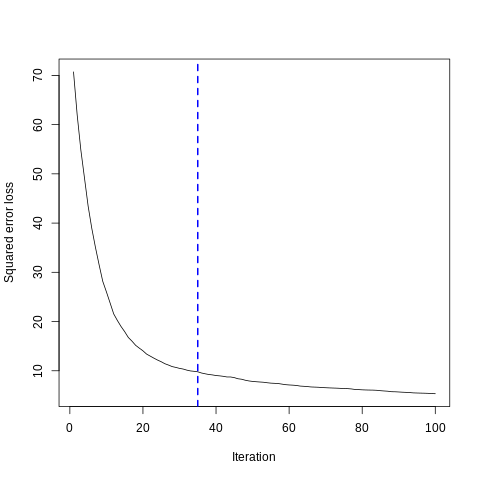

In [17]:
%%R
# Evaluate initial model
initial_n_trees <- gbm.perf(initial_model, method = "OOB")
initial_n_trees


#### Predict and Evaluate Initial Model

In [18]:
%%R
initial_predictions <- predict(initial_model, test, n.trees = initial_n_trees)
initial_mse <- mean((test$medv - initial_predictions)^2)
cat("Initial Model Test MSE:", initial_mse, "\n")

Initial Model Test MSE: 20.92635 


#### Hyperparameter Tuning for the Best Parameters

We will perform hyperparameter tuning using grid search to find the best parameters for the GBM model. The grid search will evaluate different combinations of hyperparameters such as `n.trees`, `shrinkage`,  `n.minobsinnode`, and `interaction.depth` to minimize the cross-validated mean squared error (MSE).

In [23]:
%%R
# Define hyperparameter grid
param_grid <- expand.grid(
  n.trees = c(500, 1000, 2000),
  interaction.depth = c(1, 3, 5),
  shrinkage = c(0.01, 0.05, 0.1),
  n.minobsinnode = c(5, 10)
)

# Initialize best_mse and best_params
best_mse <- Inf
best_params <- param_grid[1, ] # Initialize with the first set of parameters

set.seed(123)
for (i in 1:nrow(param_grid)) {
  .libPaths('drive/My Drive/R/') # Set the library path inside the loop
  model <- gbm(
    formula = medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + black + lstat,
    data = train,
    distribution = "gaussian",
    n.trees = param_grid$n.trees[i],
    shrinkage = param_grid$shrinkage[i],
    interaction.depth = param_grid$interaction.depth[i],
    n.minobsinnode = param_grid$n.minobsinnode[i]
  )
  # Check if the model has cv.error (cross-validation was successful)
  if (!is.null(model$cv.error)) {
    cv_mse <- min(model$cv.error)
    if (cv_mse < best_mse) {
      best_mse <- cv_mse
      best_params <- param_grid[i, ]
    }
  } else {
      # If cv.error is null, handle cases where cross-validation might fail
      # For simplicity, we can just skip this iteration or log a warning
      # For now, we'll just continue to the next iteration
      cat("Warning: Cross-validation failed for parameter combination", i, "\n")
  }
}

##### The Best Parameters

In [24]:
%%R
# Print best parameters
cat("Best Parameters:\n")
print(best_params)

Best Parameters:
  n.trees interaction.depth shrinkage n.minobsinnode
1     500                 1      0.01              5


##### Fit Final Model with Best Parameters

In [25]:
%%R
set.seed(123)
final_model <- gbm(
  formula = medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + black + lstat,
  data = train,
  distribution = "gaussian",
  n.trees = best_params$n.trees,
  shrinkage = best_params$shrinkage,
  interaction.depth = best_params$interaction.depth,
  n.minobsinnode = best_params$n.minobsinnode
)
final_model

gbm(formula = medv ~ crim + zn + indus + chas + nox + rm + age + 
    dis + rad + tax + ptratio + black + lstat, distribution = "gaussian", 
    data = train, n.trees = best_params$n.trees, interaction.depth = best_params$interaction.depth, 
    n.minobsinnode = best_params$n.minobsinnode, shrinkage = best_params$shrinkage)
A gradient boosted model with gaussian loss function.
500 iterations were performed.
There were 13 predictors of which 9 had non-zero influence.


##### Predict and Evaluate Final Model

Final Model Test MSE: 21.48463 


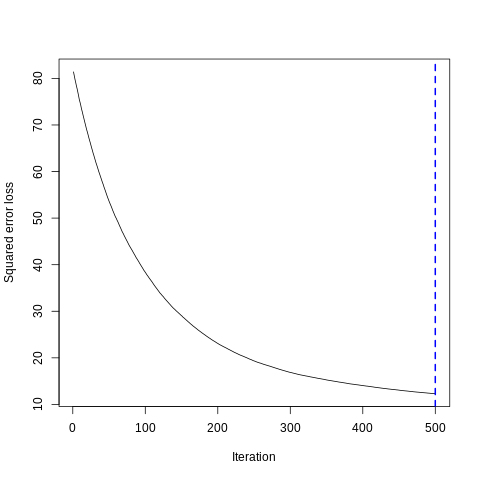

In [27]:
%%R
final_n_trees <- gbm.perf(final_model, method = "OOB")

final_predictions <- predict(final_model, test, n.trees = final_n_trees)
final_mse <- mean((test$medv - final_predictions)^2)
cat("Final Model Test MSE:", final_mse, "\n")

##### 1:1 Plot of Predicted vs Observed values

`geom_smooth()` using formula = 'y ~ x'


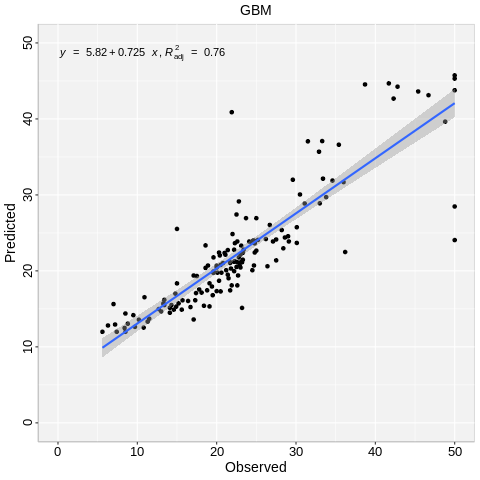

In [28]:
%%R
formula <- y ~ x
y_test <- test$medv
test_df <- data.frame(medv = y_test, medv.pred = final_predictions)

ggplot(test_df, aes(medv, medv.pred)) +
  geom_point() +
  geom_smooth(method = "lm") +
  stat_poly_eq(use_label(c("eq", "adj.R2")), formula = formula) +
  ggtitle("GBM") +
  xlab("Observed") + ylab("Predicted") +
  scale_x_continuous(limits = c(0, 50), breaks = seq(0, 50, 10)) +
  scale_y_continuous(limits = c(0, 50), breaks = seq(0, 50, 10)) +
  theme(
    panel.background = element_rect(fill = "grey95", colour = "gray75", size = 0.5, linetype = "solid"),
    axis.line = element_line(colour = "grey"),
    plot.title = element_text(size = 14, hjust = 0.5),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    axis.text.x = element_text(size = 13, colour = "black"),
    axis.text.y = element_text(size = 13, angle = 90, vjust = 0.5, hjust = 0.5, colour = "black")
  )

##### Feature Importance

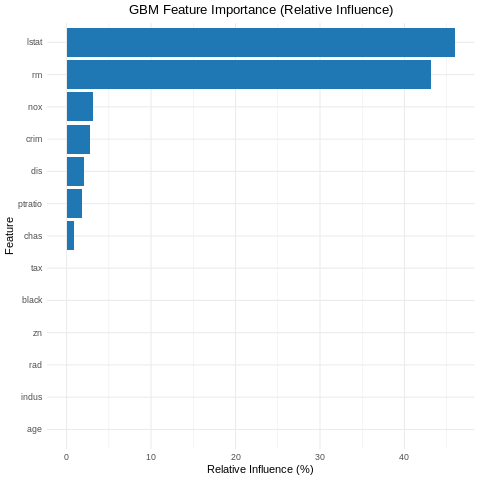

In [30]:
%%R
# Plot feature importance using ggplot2
rel_inf <- relative.influence(final_model, n.trees = final_n_trees)
rel_inf <- rel_inf / sum(rel_inf) * 100  # Normalize to percentage
importance <- data.frame(
  Feature = names(rel_inf),
  Gain = rel_inf
)
p <- ggplot(importance, aes(x = reorder(Feature, Gain), y = Gain)) +
  geom_bar(stat = "identity", fill = "#1f77b4") +
  coord_flip() +
  labs(title = "GBM Feature Importance (Relative Influence)", x = "Feature", y = "Relative Influence (%)") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))
print(p)

### Classification with GBM

In this section, we will use the {gbm} package to perform classification tasks. We will load the dataset, preprocess it, and then fit a GBM model for classification. The dataset will be split into training and testing sets, and we will evaluate the model's performance using accuracy and multi-class log loss.

#### Data and Data Preparation

We will use`health insurance` dataset to predict the product type (A, B, or C) based on various features such as age, household size, position level, and absence records.

In [ ]:
%%R
# Load the dataset
df <-readr::read_csv("https://github.com/zia207/r-colab/raw/main/Data/Machine_Learning/health_insurance.csv")
# Create dataframe with selected features
df <- df %>%
  dplyr::select(product, age, household, position_level, absent) %>%
  glimpse()
# Convert product to factor
df$product <- as.factor(df$product)

# Split into training and test sets
set.seed(123)
indices <- sample(1:nrow(df), size = 0.75 * nrow(df))
train <- df[indices, ]
test <- df[-indices, ]

Rows: 1448 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): product, gender
dbl (4): age, household, position_level, absent

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1,448
Columns: 5
$ product        <chr> "C", "A", "C", "A", "A", "A", "A", "B", "C", "B", "B", …
$ age            <dbl> 57, 21, 66, 36, 23, 31, 37, 37, 55, 66, 58, 62, 31, 45,…
$ household      <dbl> 2, 7, 7, 4, 0, 5, 3, 0, 3, 2, 1, 2, 2, 5, 3, 5, 4, 7, 7…
$ position_level <dbl> 2, 2, 2, 2, 2, 1, 3, 3, 3, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4…
$ absent         <dbl> 10, 7, 1, 6, 11, 14, 12, 25, 3, 18, 1, 25, 0, 10, 20, 2…


#### Fit GBM Classification Model

In [ ]:
%%R
# for reproducibility
set.seed(123)
initial_model <- gbm(
  formula = product ~ age + household + position_level + absent,
  data = train,
  distribution = "multinomial",  # For multi-class classification
  n.trees = 100,
  shrinkage = 0.1,
  interaction.depth = 3,
  n.minobsinnode = 10,
)
initial_model

gbm(formula = product ~ age + household + position_level + absent, 
    distribution = "multinomial", data = train, n.trees = 100, 
    interaction.depth = 3, n.minobsinnode = 10, shrinkage = 0.1)
A gradient boosted model with multinomial loss function.
100 iterations were performed.
There were 4 predictors of which 4 had non-zero influence.


#### Predictions and Evaluation

For model evalution we will use `accuracy` and `multi-class log loss` as metrics. The accuracy is the proportion of correct predictions, while the multi-class log loss measures the performance of a classification model whose output is a probability value between 0 and 1 for each class.

The multi-class log loss (also called cross-entropy loss) can be computed manually in R using the formula:

$$ \text{multi_logloss} = -\frac{1}{N} \sum_{i=1}^N \sum_{k=1}^K y_{ik} \log(\hat{p}_{ik}) $$

where:

-   $N$: Number of observations.

-   $K$: Number of classes (3 for `product`: A, B, C).

-   $y_{ik}$: 1 if observation $i$ belongs to class $k$, 0 otherwise.

-   $\hat{p}_{ik}$: Predicted probability for observation $i$ and class $k$.

The model outputs predicted probabilities for each class (via `predict(..., reshape = TRUE)`), and the true labels are encoded as 0 (A), 1 (B), and 2 (C). We’ll create a custom `multi_logloss` function to compute this metric and update the script accordingly.

In [ ]:
%%R
# Function to calculate multi_logloss
multi_logloss <- function(actual, predicted_probs) {
  epsilon <- 1e-15
  predicted_probs <- pmax(pmin(predicted_probs, 1 - epsilon), epsilon)  # Clip probabilities
  N <- nrow(predicted_probs)
  K <- ncol(predicted_probs)
  logloss <- 0
  for (i in 1:N) {
    true_class <- actual[i]
    true_class_idx <- which(levels(actual) == true_class)
    logloss <- logloss - log(predicted_probs[i, true_class_idx])
  }
  return(logloss / N)
}

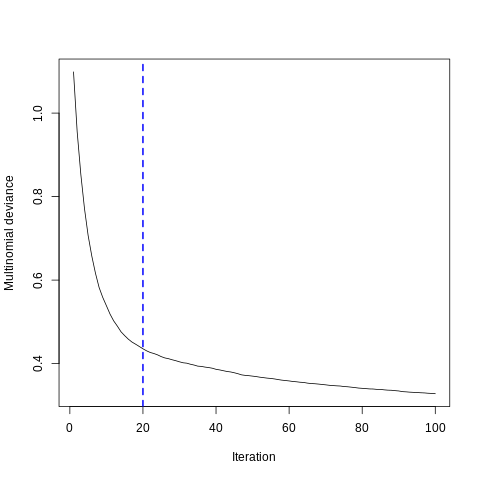

In [ ]:
%%R
# Plot model error
initial_n_trees <- gbm.perf(initial_model, method = "OOB")

In [ ]:
%%R
initial_predictions <- predict(initial_model, test, n.trees = initial_n_trees, type = "response")
initial_pred_probs <- matrix(initial_predictions, nrow = nrow(test), ncol = nlevels(df$product))
colnames(initial_pred_probs) <- levels(df$product)
initial_pred_classes <- apply(initial_pred_probs, 1, which.max)
initial_pred_classes <- levels(df$product)[initial_pred_classes]
initial_accuracy <- mean(initial_pred_classes == test$product)
initial_logloss <- multi_logloss(test$product, initial_pred_probs)
cat("Initial Model Test Accuracy:", initial_accuracy, "\n")
cat("Initial Model Multi_logloss:", initial_logloss, "\n")

Initial Model Test Accuracy: 0.7320442 
Initial Model Multi_logloss: 0.4771266 


In [ ]:
%%R
cat("Initial Model Confusion Matrix:\n")
print(table(Predicted = initial_pred_classes, Actual = test$product))

Initial Model Confusion Matrix:
         Actual
Predicted   A   B   C
        A 105  23  17
        B  19  71  14
        C   2  22  89


#### Feature Importance



##### Feature Importance plot



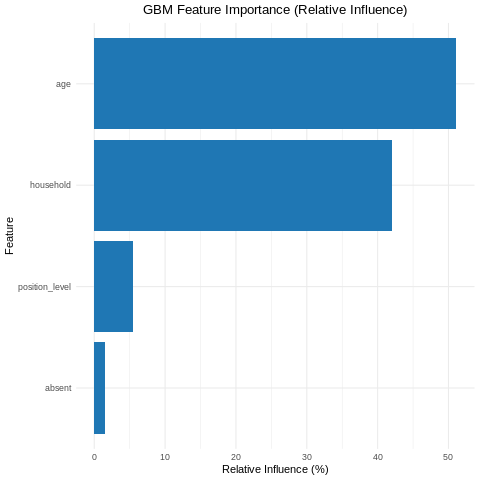

In [ ]:
%%R
rel_inf <- relative.influence(initial_model, n.trees = initial_n_trees)
rel_inf <- rel_inf / sum(rel_inf) * 100  # Normalize to percentage
importance <- data.frame(
  Feature = names(rel_inf),
  Gain = rel_inf
)
p <- ggplot(importance, aes(x = reorder(Feature, Gain), y = Gain)) +
  geom_bar(stat = "identity", fill = "#1f77b4") +
  coord_flip() +
  labs(title = "GBM Feature Importance (Relative Influence)", x = "Feature", y = "Relative Influence (%)") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))
print(p)

## Summary and Conclusion

The Gradient Boosting Machine (GBM) is a powerful ensemble learning technique that builds models by combining multiple weak learners, typically decision trees, to improve predictive accuracy. In this exercise, we implemented GBM for both regression and classification tasks using the `{gbm}` package in R. This exercise demonstrated a brief overview of GBM, including its mathematical formulation, how it works, and practical applications in R. At the end of the exercise, we successfully fitted GBM models to synthetic datasets for regression and classification tasks, evaluated their performance using appropriate metrics, and visualized feature importance.

## References

1.  Friedman, J., Hastie, T., & Tibshirani, R. (2009). *The Elements of Statistical Learning*. Springer. (Chapter 10 covers boosting and GBM fundamentals).

2.  Friedman, J. H. (2001). "Greedy Function Approximation: A Gradient Boosting Machine." *The Annals of Statistics*, 29(5), 1189–1232. (Seminal paper introducing GBM).

3.  Kuhn, M., & Johnson, K. (2013). *Applied Predictive Modeling*. Springer. (Practical guide with GBM applications in R).

4.  "Gradient Boosting in R" by DataCamp. Available at: https://www.datacamp.com/tutorial/gradient-boosting-r (Hands-on GBM implementation using `{gbm}` package).

5. "A Gentle Introduction to Gradient Boosting with gbm in R" by R-bloggers. Available at: https://www.r-bloggers.com/2021/05/gradient-boosting-with-gbm-in-r/ (Step-by-step GBM tutorial with code examples).

